In [8]:
# Impor library yang diperlukan
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # Untuk F1 score

# Sistem Fuzzy untuk Prediksi Asupan Karbohidrat
# 0. Pra-pemrosesan Data

In [24]:
# Memuat dataset
carb_df_raw = pd.read_csv('./detailed_meals_macros_CLEANED.csv')
carb_df_raw.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain,12.0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease",8.0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain,15.0
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain,10.0
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain,9.0


In [25]:
# Informasi dasar dataset
carb_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Breakfast Suggestion    

In [26]:
# Statistik deskriptif untuk kolom numerik
carb_df_raw.describe()

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,...,Lunch Carbohydrates,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Lunch Fats
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,...,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,...,68.725277,594.348716,45.234765,124.494605,43.383528,215.235571,6.902238,28.950530,11.037102,10.422261
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,...,84.843734,453.198878,119.518574,198.313817,90.973517,53.306442,2.915200,5.138153,5.366292,2.279813
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,...,1.000000,5.000000,0.200000,1.000000,1.000000,100.000000,2.000000,10.000000,1.000000,6.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,...,26.000000,309.250000,17.400000,31.325000,18.000000,180.000000,5.000000,28.000000,8.000000,9.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,...,42.000000,486.000000,28.000000,60.075000,31.000000,180.000000,6.000000,30.000000,8.000000,10.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,...,75.000000,728.000000,46.425000,138.000000,49.000000,250.000000,8.000000,30.000000,15.000000,12.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,...,1286.000000,5808.000000,2580.000000,2580.000000,1441.000000,350.000000,20.000000,40.000000,25.000000,20.000000


### Analisis Korelasi untuk Pemilihan Variabel Input
Kita akan melihat korelasi antara variabel-variabel numerik yang tersedia dengan `Carbohydrates_g` untuk membantu mengkonfirmasi atau memilih variabel input terbaik untuk sistem fuzzy.

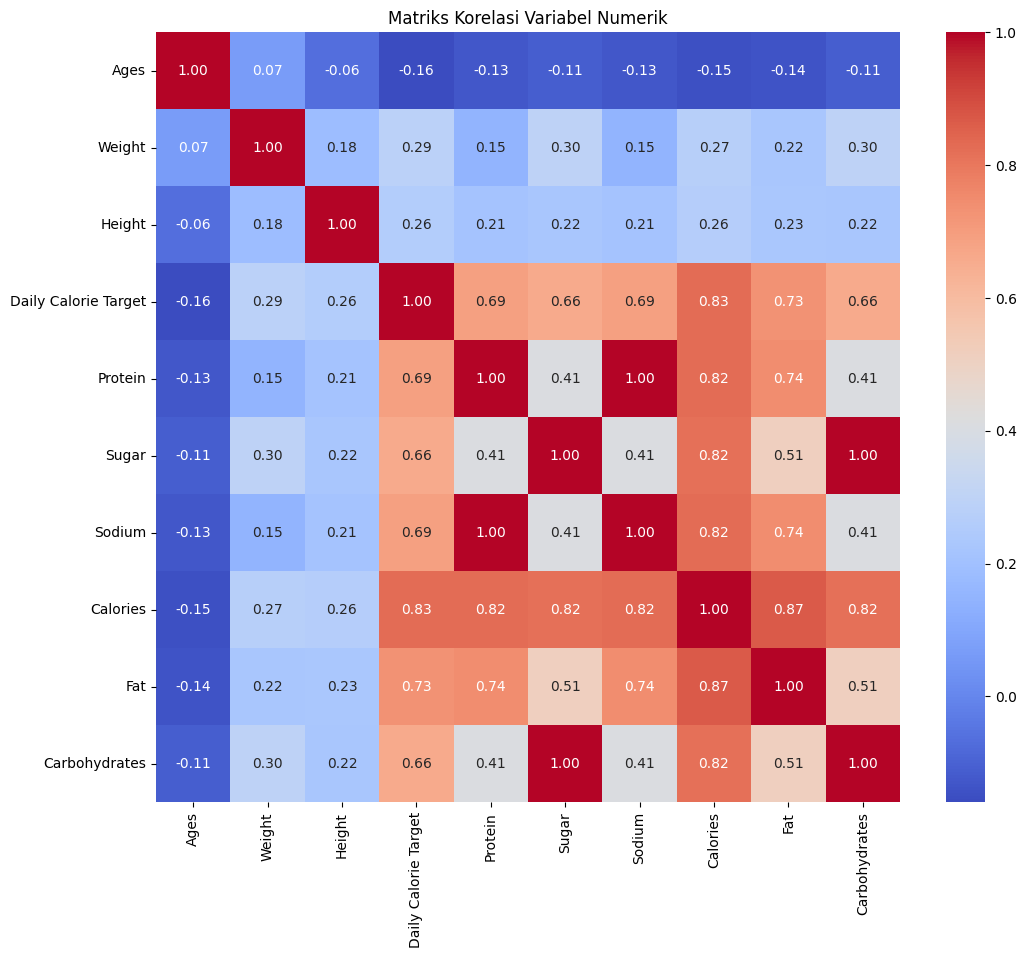

In [29]:
# Pilih kolom numerik yang relevan untuk matriks korelasi
correlation_cols = ['Ages', 'Weight', 'Height', 
                      'Daily Calorie Target', 'Protein', 
                      'Sugar', 'Sodium', 
                      'Calories', 'Fat', 'Carbohydrates'] # Termasuk target Carbohydrates_g
corr_matrix = carb_df_raw[correlation_cols].corr()

# Visualisasi heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**Analisis Korelasi:**
- `Daily_Caloric_Intake` memiliki korelasi positif tertinggi dengan `Carbohydrates_g` (sekitar 0.8), yang masuk akal karena karbohidrat adalah sumber kalori utama.
- `Protein_g` dan `Fat_g` juga memiliki korelasi positif, yang mengindikasikan bahwa diet tinggi kalori secara umum mungkin memiliki jumlah makronutrien yang lebih tinggi secara keseluruhan.
- `BMI`, `Weight_kg`, `Height_cm`, dan `Age` memiliki korelasi yang lebih rendah dengan `Carbohydrates_g` dibandingkan dengan kalori, protein, atau lemak.

Meskipun definisi sistem fuzzy menentukan BMI, BodyFat, Sex, dan Age sebagai input, korelasi menunjukkan bahwa `Daily_Caloric_Intake` akan menjadi prediktor yang jauh lebih kuat untuk `Carbohydrates_g` daripada BMI atau Age secara langsung dari dataset ini. Namun, untuk mematuhi *objective* dan *flow* dari `protein.ipynb` dan `Fuzzy System Definition_Carbohydrate Intake.md`, kita akan melanjutkan dengan input yang ditentukan (BMI, BodyFat, Sex, Age) dan menggunakan `Carbohydrates_g` sebagai ground truth.

Kita akan menambahkan kolom `BodyFat` dari dataset `fuzzy_macros_dataset_bmi.csv` ke dataset `carb_df` karena dataset `diet_recommendations_dataset.csv` tidak memilikinya. Ini dilakukan untuk keseragaman input dengan sistem fuzzy protein/lemak/kalori sebelumnya dan untuk memenuhi definisi sistem.

In [ ]:
# Memuat dataset protein untuk mendapatkan kolom BodyFat (sebagai proxy jika tidak ada di dataset utama)
# CATATAN: Ini adalah asumsi jika 'BodyFat' tidak ada di 'diet_recommendations_dataset.csv'.
# Jika 'diet_recommendations_dataset.csv' SUDAH memiliki 'BodyFat', langkah ini bisa dilewati atau disesuaikan.

try:
    protein_dataset_for_bf = pd.read_csv('./fuzzy_macros_dataset_bmi.csv')
    # Asumsikan kita bisa menggabungkan berdasarkan beberapa kunci umum atau indeks jika Patient_ID tidak cocok
    # Untuk demonstrasi, kita akan mengambil kolom BodyFat dan Sex dari sini dan mencoba menambahkannya.
    # Ini mungkin tidak ideal jika datasetnya sangat berbeda.
    if 'BodyFat' not in carb_df_raw.columns and 'BodyFat' in protein_dataset_for_bf.columns:
        print("Menambahkan kolom 'BodyFat' dari dataset lain (asumsi untuk demonstrasi).")
        # Ambil BodyFat dan Sex, cocokkan dengan indeks jika ukurannya sama (cara sederhana, mungkin perlu penyesuaian)
        if len(carb_df_raw) == len(protein_dataset_for_bf):
            carb_df_raw['BodyFat'] = protein_dataset_for_bf['BodyFat']
            # Pastikan kolom 'Sex' juga konsisten atau diambil jika tidak ada
            if 'Sex' not in carb_df_raw.columns and 'Sex' in protein_dataset_for_bf.columns:
                 carb_df_raw['Sex'] = protein_dataset_for_bf['Sex']
        else:
            print("Ukuran dataset tidak cocok untuk penggabungan BodyFat sederhana. Menggunakan nilai placeholder.")
            # Jika tidak bisa digabungkan, kita mungkin perlu membuat data BodyFat sintetis atau menggunakan subset
            # Untuk sekarang, kita bisa isi dengan median atau biarkan (tapi fuzzy system butuh ini)
            # Sebagai placeholder, kita akan tambahkan kolom dengan nilai median dari dataset protein jika ada
            if 'BodyFat' in protein_dataset_for_bf.columns:
                 carb_df_raw['BodyFat'] = protein_dataset_for_bf['BodyFat'].median()
            else: # Jika dataset protein juga tidak punya BodyFat, ini akan jadi masalah besar
                 print("Kolom 'BodyFat' tidak ditemukan di kedua dataset. Sistem fuzzy tidak dapat dilanjutkan seperti yang didefinisikan.")
                 # Menghentikan atau membuat data dummy akan menjadi pilihan di sini
    elif 'BodyFat' not in carb_df_raw.columns:
        print("Kolom 'BodyFat' tidak ada. Menggunakan nilai placeholder (median BMI) sebagai proxy kasar - TIDAK IDEAL.")
        carb_df_raw['BodyFat'] = carb_df_raw['BMI'] # Ini adalah proxy yang sangat kasar dan tidak akurat
    
    # Pastikan kolom 'Sex' ada dan memiliki format yang benar (M/F)
    if 'Gender' in carb_df_raw.columns and 'Sex' not in carb_df_raw.columns:
        carb_df_raw['Sex'] = carb_df_raw['Gender'].apply(lambda x: 'M' if x.lower() == 'male' else ('F' if x.lower() == 'female' else None))
    elif 'Sex' not in carb_df_raw.columns:
        print("Kolom 'Sex' atau 'Gender' tidak ditemukan. Menggunakan nilai placeholder 'M'.")
        carb_df_raw['Sex'] = 'M'
        
    # Cek apakah kolom yang dibutuhkan sudah ada
    if not all(col in carb_df_raw.columns for col in ['BMI', 'BodyFat', 'Sex', 'Age', 'Carbohydrates_g']):
        raise ValueError("Dataset tidak memiliki semua kolom yang dibutuhkan (BMI, BodyFat, Sex, Age, Carbohydrates_g) setelah upaya penambahan.")
        
except FileNotFoundError:
    print("File 'fuzzy_macros_dataset_bmi.csv' tidak ditemukan untuk mengambil kolom BodyFat.")
    if 'BodyFat' not in carb_df_raw.columns:
        print("Kolom 'BodyFat' tidak ada. Menggunakan nilai placeholder (median BMI) sebagai proxy kasar - TIDAK IDEAL.")
        carb_df_raw['BodyFat'] = carb_df_raw['BMI'] 
    if 'Gender' in carb_df_raw.columns and 'Sex' not in carb_df_raw.columns:
        carb_df_raw['Sex'] = carb_df_raw['Gender'].apply(lambda x: 'M' if x.lower() == 'male' else ('F' if x.lower() == 'female' else None))
    elif 'Sex' not in carb_df_raw.columns:
        print("Kolom 'Sex' atau 'Gender' tidak ditemukan. Menggunakan nilai placeholder 'M'.")
        carb_df_raw['Sex'] = 'M'

carb_df_raw.head() # Tampilkan head setelah potensi penambahan kolom

### Deteksi dan Penghapusan Outlier (Lanjutan)

In [ ]:
# Visualisasi persebaran data menggunakan boxplot untuk mengidentifikasi outlier pada kolom yang akan digunakan
cols_for_fuzzy_carb = ['BMI', 'BodyFat', 'Age', 'Carbohydrates_g'] 
n_cols_carb = len(cols_for_fuzzy_carb)

plt.figure(figsize=(18, 5))

for i, column in enumerate(cols_for_fuzzy_carb): 
    plt.subplot(1, n_cols_carb, i+1)
    sns.boxplot(y=carb_df_raw[column], color='lightcoral') # Menggunakan carb_df_raw yang sudah dimodifikasi
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Filter dan menghapus data dari outlier dengan metode IQR (Interquartile Range)
df_cleaned_carb = carb_df_raw.copy()
print(f"Jumlah data sebelum penghapusan outlier IQR: {df_cleaned_carb.shape[0]}")
for column in cols_for_fuzzy_carb: # Menggunakan kolom yang sudah ditentukan
    Q1 = df_cleaned_carb[column].quantile(0.25)
    Q3 = df_cleaned_carb[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_col = df_cleaned_carb.shape[0]
    df_cleaned_carb = df_cleaned_carb[(df_cleaned_carb[column] >= lower_bound) & (df_cleaned_carb[column] <= upper_bound)]
    after_col = df_cleaned_carb.shape[0]
    print(f"{column}: Dihapus {before_col - after_col} data outlier")
print(f"Jumlah data setelah penghapusan outlier IQR: {df_cleaned_carb.shape[0]}")

# Visualisasi persebaran data setelah menghapus outlier
plt.figure(figsize=(18, 5))
for i, column in enumerate(cols_for_fuzzy_carb):
    plt.subplot(1, len(cols_for_fuzzy_carb), i+1)
    sns.boxplot(y=df_cleaned_carb[column], color='lightgreen')
    plt.title(f'{column} (Dibersihkan)')

plt.tight_layout()
plt.show()

### Pemfilteran Data Fisiologis (Lanjutan)
Berdasarkan `Fuzzy System Definition_Carbohydrate Intake.md`:
- Rentang Usia: [18, 80]
- Rentang BMI: [15, 50]
- Rentang BodyFat Pria: [2, 60]
- Rentang BodyFat Wanita: [10, 60]
- Rentang Carbohydrates_g universe MF: [100, 400]

Filter data untuk tetap berada dalam rentang yang masuk akal untuk MF ini.

In [ ]:
print(f"Jumlah data sebelum pemfilteran fisiologis: {df_cleaned_carb.shape[0]}")

# Filter Usia
df_cleaned_carb = df_cleaned_carb[(df_cleaned_carb['Age'] >= 18) & (df_cleaned_carb['Age'] <= 80)]

# Filter BMI
df_cleaned_carb = df_cleaned_carb[(df_cleaned_carb['BMI'] >= 15) & (df_cleaned_carb['BMI'] <= 50)]

# Filter BodyFat (berdasarkan jenis kelamin)
df_cleaned_carb = df_cleaned_carb[~((df_cleaned_carb['Sex'] == 'M') & ((df_cleaned_carb['BodyFat'] < 2) | (df_cleaned_carb['BodyFat'] > 60)))]
df_cleaned_carb = df_cleaned_carb[~((df_cleaned_carb['Sex'] == 'F') & ((df_cleaned_carb['BodyFat'] < 10) | (df_cleaned_carb['BodyFat'] > 60)))]

# Filter Carbohydrates_g (variabel target, untuk rentang evaluasi yang wajar, sedikit lebih lebar dari universe MF output)
df_cleaned_carb = df_cleaned_carb[(df_cleaned_carb['Carbohydrates_g'] >= 50) & (df_cleaned_carb['Carbohydrates_g'] <= 450)] 

print(f"Jumlah data setelah pemfilteran fisiologis: {df_cleaned_carb.shape[0]}")
carb_df_final = df_cleaned_carb.reset_index(drop=True) # DataFrame final untuk sistem fuzzy

# 1. Variabel Linguistik dan Fungsi Keanggotaan (MFs)

### Fungsi Pembantu untuk MFs

In [ ]:
def trapmf(x, abcd):
    a, b, c, d = abcd
    if a > b: raise ValueError('a > b')
    if b > c: raise ValueError('b > c') # Allow b == c for triangular
    if c > d: raise ValueError('c > d')
        
    y = np.zeros_like(x if isinstance(x, np.ndarray) else [x])
    
    # Handle scalar input
    if not isinstance(x, np.ndarray):
        x = np.array([x])
        y = np.zeros_like(x, dtype=float)
        single_value = True
    else:
        y = np.zeros_like(x, dtype=float)
        single_value = False

    # Left slope
    if a != b:
        idx = np.logical_and(x >= a, x < b)
        y[idx] = (x[idx] - a) / (b - a)

    # Top part
    idx = np.logical_and(x >= b, x <= c)
    y[idx] = 1

    # Right slope
    if c != d:
        idx = np.logical_and(x > c, x <= d)
        y[idx] = (d - x[idx]) / (d - c)

    return y[0] if single_value else y
        
    return y[0] if isinstance(y, np.ndarray) and y.size == 1 else y

def trimf(x, abc):
    a, b, c = abc
    if a > b: raise ValueError('a > b dalam trimf')
    if b > c: raise ValueError('b > c dalam trimf')
    return trapmf(x, [a, b, b, c])

### Input: BMI (kg/m²)

In [ ]:
def bmi_underweight_carb(bmi):
    return trapmf(bmi, [15, 15, 17, 18.5])
def bmi_normal_carb(bmi):
    return trimf(bmi, [17, 21.75, 25])
def bmi_overweight_carb(bmi):
    return trimf(bmi, [25, 27.5, 30])
def bmi_obese_carb(bmi):
    return trapmf(bmi, [30, 35, 50, 50])

x_bmi_vis_c = np.arange(10, 55, 0.1)
plt.figure(figsize=(10, 6))
plt.plot(x_bmi_vis_c, bmi_underweight_carb(x_bmi_vis_c), label='Kurus')
plt.plot(x_bmi_vis_c, bmi_normal_carb(x_bmi_vis_c), label='Normal')
plt.plot(x_bmi_vis_c, bmi_overweight_carb(x_bmi_vis_c), label='Berlebih')
plt.plot(x_bmi_vis_c, bmi_obese_carb(x_bmi_vis_c), label='Obesitas')
plt.title('Fungsi Keanggotaan untuk BMI (Karbohidrat)')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Derajat Keanggotaan')
plt.legend(); plt.grid(True); plt.show()

### Input: Persentase Lemak Tubuh (Pria)

In [ ]:
def bfm_lean_carb(bodyfat):
    return trapmf(bodyfat, [2, 2, 8, 14])
def bfm_normal_carb(bodyfat):
    return trimf(bodyfat, [10, 18, 25])
def bfm_high_carb(bodyfat):
    return trapmf(bodyfat, [20, 30, 60, 60])

x_bf_m_vis_c = np.arange(0, 65, 0.1)
plt.figure(figsize=(10, 6))
plt.plot(x_bf_m_vis_c, bfm_lean_carb(x_bf_m_vis_c), label='Rendah_Pria')
plt.plot(x_bf_m_vis_c, bfm_normal_carb(x_bf_m_vis_c), label='Normal_Pria')
plt.plot(x_bf_m_vis_c, bfm_high_carb(x_bf_m_vis_c), label='Tinggi_Pria')
plt.title('Fungsi Keanggotaan untuk Lemak Tubuh % (Pria - Karbohidrat)')
plt.xlabel('Lemak Tubuh %'); plt.ylabel('Derajat Keanggotaan')
plt.legend(); plt.grid(True); plt.show()

### Input: Persentase Lemak Tubuh (Wanita)

In [ ]:
def bfw_lean_carb(bodyfat):
    return trapmf(bodyfat, [10, 10, 18, 24])
def bfw_normal_carb(bodyfat):
    return trimf(bodyfat, [20, 28, 35])
def bfw_high_carb(bodyfat):
    return trapmf(bodyfat, [30, 40, 60, 60])

x_bf_f_vis_c = np.arange(5, 65, 0.1)
plt.figure(figsize=(10, 6))
plt.plot(x_bf_f_vis_c, bfw_lean_carb(x_bf_f_vis_c), label='Rendah_Wanita')
plt.plot(x_bf_f_vis_c, bfw_normal_carb(x_bf_f_vis_c), label='Normal_Wanita')
plt.plot(x_bf_f_vis_c, bfw_high_carb(x_bf_f_vis_c), label='Tinggi_Wanita')
plt.title('Fungsi Keanggotaan untuk Lemak Tubuh % (Wanita - Karbohidrat)')
plt.xlabel('Lemak Tubuh %'); plt.ylabel('Derajat Keanggotaan')
plt.legend(); plt.grid(True); plt.show()

### Input: Usia (tahun)

In [ ]:
def age_young_carb(age):
    return trapmf(age, [18, 18, 25, 40])
def age_middle_carb(age):
    return trimf(age, [30, 45, 60])
def age_senior_carb(age):
    return trapmf(age, [50, 65, 80, 80])

x_age_vis_c = np.arange(15, 85, 0.1)
plt.figure(figsize=(10, 6))
plt.plot(x_age_vis_c, age_young_carb(x_age_vis_c), label='Muda')
plt.plot(x_age_vis_c, age_middle_carb(x_age_vis_c), label='Paruh Baya')
plt.plot(x_age_vis_c, age_senior_carb(x_age_vis_c), label='Senior')
plt.title('Fungsi Keanggotaan untuk Usia (Karbohidrat)')
plt.xlabel('Usia (tahun)'); plt.ylabel('Derajat Keanggotaan')
plt.legend(); plt.grid(True); plt.show()

### Output: Asupan Karbohidrat (g)

In [ ]:
# MFs Mamdani untuk Karbohidrat (sesuai .md)
def carb_low_mf(carbs):
    return trapmf(carbs, [100, 100, 150, 200])
def carb_medium_mf(carbs):
    return trimf(carbs, [160, 240, 300])
def carb_high_mf(carbs):
    return trapmf(carbs, [250, 320, 400, 400])

# Konstanta Sugeno untuk Karbohidrat (sesuai .md)
carb_sugeno_constants = {
    'Low': 150,
    'Medium': 240,
    'High': 320
}

# Visualisasi MFs Karbohidrat (Mamdani)
x_carb_vis_out = np.arange(80, 420, 1)
plt.figure(figsize=(10, 6))
plt.plot(x_carb_vis_out, carb_low_mf(x_carb_vis_out), label='Rendah')
plt.plot(x_carb_vis_out, carb_medium_mf(x_carb_vis_out), label='Sedang')
plt.plot(x_carb_vis_out, carb_high_mf(x_carb_vis_out), label='Tinggi')
plt.title('Fungsi Keanggotaan untuk Asupan Karbohidrat (g)')
plt.xlabel('Karbohidrat (g)'); plt.ylabel('Derajat Keanggotaan')
plt.legend(); plt.grid(True); plt.show()

# 2. Fuzzifikasi

In [ ]:
bmi_terms_carb = {
    'Underweight': bmi_underweight_carb,
    'Normal': bmi_normal_carb,
    'Overweight': bmi_overweight_carb,
    'Obese': bmi_obese_carb
}
bodyfat_m_terms_carb = { 
    'Lean_M': bfm_lean_carb, 
    'Normal_M': bfm_normal_carb, 
    'High_M': bfm_high_carb
}
bodyfat_f_terms_carb = { 
    'Lean_F': bfw_lean_carb, 
    'Normal_F': bfw_normal_carb, 
    'High_F': bfw_high_carb
}
age_terms_carb = {
    'Young': age_young_carb,
    'Middle': age_middle_carb,
    'Senior': age_senior_carb
}
carb_output_terms_mamdani = {
    'Low': carb_low_mf,
    'Medium': carb_medium_mf,
    'High': carb_high_mf
}

In [ ]:
def fuzzify_all_inputs_carb(bmi_val, bodyfat_val, sex_val, age_val):
    f_bmi = {term: mf(bmi_val) for term, mf in bmi_terms_carb.items()}
    bodyfat_terms_to_use = bodyfat_m_terms_carb if sex_val == 'M' else bodyfat_f_terms_carb
    f_bf = {term: mf(bodyfat_val) for term, mf in bodyfat_terms_to_use.items()}
    f_age = {term: mf(age_val) for term, mf in age_terms_carb.items()}
    return f_bmi, f_bf, f_age

# Contoh Fuzzifikasi untuk Karbohidrat
example_bmi_c, example_bf_c, example_sex_c, example_age_c = 28, 30, 'F', 50
fuzz_bmi_c_ex, fuzz_bf_c_ex, fuzz_age_c_ex = fuzzify_all_inputs_carb(example_bmi_c, example_bf_c, example_sex_c, example_age_c)
print(f"Fuzzifikasi BMI untuk {example_bmi_c}: {fuzz_bmi_c_ex}")
print(f"Fuzzifikasi BodyFat ({example_sex_c}) untuk {example_bf_c}%: {fuzz_bf_c_ex}")
print(f"Fuzzifikasi Usia untuk {example_age_c} tahun: {f_age_c_ex}")

# 3. Mesin Inferensi (Evaluasi Aturan)

In [ ]:
# Aturan untuk Asupan Karbohidrat (sama seperti yang didefinisikan di .md)
carb_rules = [
    # Pria
    ('M', 'Underweight', 'Lean_M', 'Young', 'Medium'), ('M', 'Underweight', 'Lean_M', 'Middle', 'Medium'), ('M', 'Underweight', 'Lean_M', 'Senior', 'Low'),
    ('M', 'Underweight', 'Normal_M', 'Young', 'Medium'), ('M', 'Underweight', 'Normal_M', 'Middle', 'Low'), ('M', 'Underweight', 'Normal_M', 'Senior', 'Low'),
    ('M', 'Underweight', 'High_M', 'Young', 'Low'), ('M', 'Underweight', 'High_M', 'Middle', 'Low'), ('M', 'Underweight', 'High_M', 'Senior', 'Low'),
    ('M', 'Normal', 'Lean_M', 'Young', 'High'), ('M', 'Normal', 'Lean_M', 'Middle', 'High'), ('M', 'Normal', 'Lean_M', 'Senior', 'Medium'),
    ('M', 'Normal', 'Normal_M', 'Young', 'High'), ('M', 'Normal', 'Normal_M', 'Middle', 'Medium'), ('M', 'Normal', 'Normal_M', 'Senior', 'Low'),
    ('M', 'Normal', 'High_M', 'Young', 'Medium'), ('M', 'Normal', 'High_M', 'Middle', 'Low'), ('M', 'Normal', 'High_M', 'Senior', 'Low'),
    ('M', 'Overweight', 'Lean_M', 'Young', 'High'), ('M', 'Overweight', 'Lean_M', 'Middle', 'High'), ('M', 'Overweight', 'Lean_M', 'Senior', 'Medium'),
    ('M', 'Overweight', 'Normal_M', 'Young', 'High'), ('M', 'Overweight', 'Normal_M', 'Middle', 'High'), ('M', 'Overweight', 'Normal_M', 'Senior', 'Medium'),
    ('M', 'Overweight', 'High_M', 'Young', 'Medium'), ('M', 'Overweight', 'High_M', 'Middle', 'Medium'), ('M', 'Overweight', 'High_M', 'Senior', 'Low'),
    ('M', 'Obese', 'Lean_M', 'Young', 'High'), ('M', 'Obese', 'Lean_M', 'Middle', 'Medium'), ('M', 'Obese', 'Lean_M', 'Senior', 'Low'),
    ('M', 'Obese', 'Normal_M', 'Young', 'High'), ('M', 'Obese', 'Normal_M', 'Middle', 'Medium'), ('M', 'Obese', 'Normal_M', 'Senior', 'Low'),
    ('M', 'Obese', 'High_M', 'Young', 'Medium'), ('M', 'Obese', 'High_M', 'Middle', 'Low'), ('M', 'Obese', 'High_M', 'Senior', 'Low'),
    # Wanita
    ('F', 'Underweight', 'Lean_F', 'Young', 'Medium'), ('F', 'Underweight', 'Lean_F', 'Middle', 'Low'), ('F', 'Underweight', 'Lean_F', 'Senior', 'Low'),
    ('F', 'Underweight', 'Normal_F', 'Young', 'Low'), ('F', 'Underweight', 'Normal_F', 'Middle', 'Low'), ('F', 'Underweight', 'Normal_F', 'Senior', 'Low'),
    ('F', 'Underweight', 'High_F', 'Young', 'Low'), ('F', 'Underweight', 'High_F', 'Middle', 'Low'), ('F', 'Underweight', 'High_F', 'Senior', 'Low'),
    ('F', 'Normal', 'Lean_F', 'Young', 'High'), ('F', 'Normal', 'Lean_F', 'Middle', 'Medium'), ('F', 'Normal', 'Lean_F', 'Senior', 'Low'),
    ('F', 'Normal', 'Normal_F', 'Young', 'Medium'), ('F', 'Normal', 'Normal_F', 'Middle', 'Medium'), ('F', 'Normal', 'Normal_F', 'Senior', 'Low'),
    ('F', 'Normal', 'High_F', 'Young', 'Low'), ('F', 'Normal', 'High_F', 'Middle', 'Low'), ('F', 'Normal', 'High_F', 'Senior', 'Low'),
    ('F', 'Overweight', 'Lean_F', 'Young', 'High'), ('F', 'Overweight', 'Lean_F', 'Middle', 'Medium'), ('F', 'Overweight', 'Lean_F', 'Senior', 'Low'),
    ('F', 'Overweight', 'Normal_F', 'Young', 'High'), ('F', 'Overweight', 'Normal_F', 'Middle', 'Medium'), ('F', 'Overweight', 'Normal_F', 'Senior', 'Low'),
    ('F', 'Overweight', 'High_F', 'Young', 'Medium'), ('F', 'Overweight', 'High_F', 'Middle', 'Low'), ('F', 'Overweight', 'High_F', 'Senior', 'Low'),
    ('F', 'Obese', 'Lean_F', 'Young', 'Medium'), ('F', 'Obese', 'Lean_F', 'Middle', 'Low'), ('F', 'Obese', 'Lean_F', 'Senior', 'Low'),
    ('F', 'Obese', 'Normal_F', 'Young', 'Medium'), ('F', 'Obese', 'Normal_F', 'Middle', 'Low'), ('F', 'Obese', 'Normal_F', 'Senior', 'Low'),
    ('F', 'Obese', 'High_F', 'Young', 'Low'), ('F', 'Obese', 'High_F', 'Middle', 'Low'), ('F', 'Obese', 'High_F', 'Senior', 'Low'),
]

In [ ]:
def apply_carb_rules(fuzz_bmi, fuzz_bf, fuzz_age, sex_input):
    aggregated_mamdani_strengths = {term: 0.0 for term in carb_output_mamdani_terms}
    sugeno_rule_outputs = []
    active_rules_details_list = []

    for rule_sex, bmi_term, bf_term, age_term, carb_consequent_term in carb_rules:
        if rule_sex != sex_input:
            continue

        bmi_strength = fuzz_bmi.get(bmi_term, 0)
        bf_strength = fuzz_bf.get(bf_term, 0)
        age_strength = fuzz_age.get(age_term, 0)
        
        rule_strength = min(bmi_strength, bf_strength, age_strength)
        
        if rule_strength > 0:
            active_rules_details_list.append({
                'Sex': rule_sex, 'BMI Term': bmi_term, 'BMI Strength': bmi_strength,
                'BF Term': bf_term, 'BF Strength': bf_strength, 'Age Term': age_term, 'Age Strength': age_strength,
                'Carb Consequent': carb_consequent_term, 'Rule Strength': rule_strength
            })
            
            aggregated_mamdani_strengths[carb_consequent_term] = max(
                aggregated_mamdani_strengths[carb_consequent_term], rule_strength
            )
            
            sugeno_consequent_value = carb_sugeno_constants[carb_consequent_term]
            sugeno_rule_outputs.append((rule_strength, sugeno_consequent_value))
            
    return aggregated_mamdani_strengths, sugeno_rule_outputs, pd.DataFrame(active_rules_details_list)

In [ ]:
# Contoh aplikasi aturan untuk Karbohidrat
agg_mamdani_c, sug_outputs_c, active_rules_df_c = apply_carb_rules(fuzz_bmi_c_ex, fuzz_bf_c_ex, fuzz_age_c_ex, example_sex_carb_fuzz)
print("Kekuatan Mamdani Teragregasi (Karbohidrat):", agg_mamdani_c)
print("\nOutput Aturan Sugeno (Karbohidrat - kekuatan, nilai konsekuen):", sug_outputs_c)
print("\nDetail Aturan Aktif (Karbohidrat):")
if not active_rules_df_c.empty:
    display(active_rules_df_c)
else:
    print("Tidak ada aturan yang aktif untuk input yang diberikan.")

# 4. Defuzzifikasi

### 4.1 Mamdani (Centroid)

In [ ]:
carb_universe_defuzz = np.arange(100, 401, 1) # Semesta output karbohidrat untuk defuzzifikasi

def defuzzify_mamdani_centroid_carb(aggregated_strengths, output_universe):
    numerator = 0
    denominator = 0
    aggregated_mf_plot_values = np.zeros_like(output_universe, dtype=float)

    for i, carb_val in enumerate(output_universe):
        max_membership_for_val = 0
        for carb_term, strength in aggregated_strengths.items():
            if strength > 0:
                clipped_value = min(carb_output_mamdani_terms[carb_term](carb_val), strength)
                max_membership_for_val = max(max_membership_for_val, clipped_value)
        aggregated_mf_plot_values[i] = max_membership_for_val
        numerator += carb_val * max_membership_for_val
        denominator += max_membership_for_val
        
    if denominator == 0: return 0 
    return numerator / denominator

mamdani_carb_pred = defuzzify_mamdani_centroid_carb(agg_mamdani_c, carb_universe_defuzz)
print(f"Prediksi Karbohidrat (Centroid Mamdani) untuk contoh: {mamdani_carb_pred:.2f}g")

### 4.2 Sugeno (Rata-rata Tertimbang)

In [ ]:
def defuzzify_sugeno_weighted_average_carb(sugeno_rule_outputs_list):
    numerator = 0
    denominator = 0
    if not sugeno_rule_outputs_list: return 0
    for strength, consequent_value in sugeno_rule_outputs_list:
        numerator += strength * consequent_value
        denominator += strength
    if denominator == 0: return 0
    return numerator / denominator

sugeno_carb_pred = defuzzify_sugeno_weighted_average_carb(sug_outputs_c)
print(f"Prediksi Karbohidrat (Rata-rata Tertimbang Sugeno) untuk contoh: {sugeno_carb_pred:.2f}g")

# 5. Evaluasi

In [ ]:
mamdani_carb_predictions_eval = []
sugeno_carb_predictions_eval = []
actual_carb_values_eval = []

for index, row in carb_df_final.iterrows(): 
    bmi_val = row['BMI']
    bodyfat_val = row['BodyFat']
    sex_val = row['Sex']
    age_val = row['Age']
    actual_carb = row['Carbohydrates_g']
    
    f_bmi, f_bf, f_age = fuzzify_all_inputs_carb(bmi_val, bodyfat_val, sex_val, age_val)
    agg_mamdani_strengths, sug_rule_outputs, _ = apply_carb_rules(f_bmi, f_bf, f_age, sex_val)
    
    mamdani_pred = defuzzify_mamdani_centroid_carb(agg_mamdani_strengths, carb_universe_defuzz)
    sugeno_pred = defuzzify_sugeno_weighted_average_carb(sug_rule_outputs)
    
    mamdani_carb_predictions_eval.append(mamdani_pred)
    sugeno_carb_predictions_eval.append(sugeno_pred)
    actual_carb_values_eval.append(actual_carb)

carb_df_final['Carb_Mamdani_Predicted'] = mamdani_carb_predictions_eval
carb_df_final['Carb_Sugeno_Predicted'] = sugeno_carb_predictions_eval

print("\n--- Contoh Karbohidrat Aktual vs Prediksi (dengan prediksi) ---")
print(carb_df_final[['Carbohydrates_g', 'Carb_Mamdani_Predicted', 'Carb_Sugeno_Predicted']].head())

In [ ]:
# Evaluasi F1 Score untuk Karbohidrat
carb_bins_f1_eval = [0, 195, 280, float('inf')] # Rendah hingga 195; Sedang hingga 280; Tinggi di atasnya
carb_labels_f1_eval = [0, 1, 2] # Mewakili Rendah, Sedang, Tinggi

actual_carb_binned_f1 = pd.cut(carb_df_final['Carbohydrates_g'], bins=carb_bins_f1_eval, labels=carb_labels_f1_eval, include_lowest=True, duplicates='drop')
mamdani_carb_binned_f1 = pd.cut(carb_df_final['Carb_Mamdani_Predicted'], bins=carb_bins_f1_eval, labels=carb_labels_f1_eval, include_lowest=True, duplicates='drop')
sugeno_carb_binned_f1 = pd.cut(carb_df_final['Carb_Sugeno_Predicted'], bins=carb_bins_f1_eval, labels=carb_labels_f1_eval, include_lowest=True, duplicates='drop')

valid_idx_mamdani_c = actual_carb_binned_f1.notna() & mamdani_carb_binned_f1.notna()
valid_idx_sugeno_c = actual_carb_binned_f1.notna() & sugeno_carb_binned_f1.notna()

if valid_idx_mamdani_c.sum() > 0 and len(np.unique(actual_carb_binned_f1[valid_idx_mamdani_c])) > 1:
    f1_mamdani_carb = metrics.f1_score(actual_carb_binned_f1[valid_idx_mamdani_c], mamdani_carb_binned_f1[valid_idx_mamdani_c], average='macro', zero_division=0)
    print(f"\nF1 Score (Mamdani Karbohidrat - Binned): {f1_mamdani_carb:.4f}")
else:
    print("\nTidak dapat menghitung F1 score Mamdani untuk Karbohidrat karena data tidak mencukupi atau hanya ada satu kelas.")

if valid_idx_sugeno_c.sum() > 0 and len(np.unique(actual_carb_binned_f1[valid_idx_sugeno_c])) > 1:
    f1_sugeno_carb = metrics.f1_score(actual_carb_binned_f1[valid_idx_sugeno_c], sugeno_carb_binned_f1[valid_idx_sugeno_c], average='macro', zero_division=0)
    print(f"F1 Score (Sugeno Karbohidrat - Binned): {f1_sugeno_carb:.4f}")
else:
    print("\nTidak dapat menghitung F1 score Sugeno untuk Karbohidrat karena data tidak mencukupi atau hanya ada satu kelas.")

In [ ]:
# Scatter plot Aktual vs. Prediksi Karbohidrat
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(carb_df_final['Carbohydrates_g'], carb_df_final['Carb_Mamdani_Predicted'], alpha=0.6, label='Mamdani Karbohidrat')
plt.plot([carb_df_final['Carbohydrates_g'].min(), carb_df_final['Carbohydrates_g'].max()], 
         [carb_df_final['Carbohydrates_g'].min(), carb_df_final['Carbohydrates_g'].max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Karbohidrat Aktual (g)')
plt.ylabel('Prediksi Karbohidrat Mamdani (g)')
plt.title('Mamdani: Karbohidrat Aktual vs. Prediksi')
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(carb_df_final['Carbohydrates_g'], carb_df_final['Carb_Sugeno_Predicted'], alpha=0.6, color='green', label='Sugeno Karbohidrat')
plt.plot([carb_df_final['Carbohydrates_g'].min(), carb_df_final['Carbohydrates_g'].max()], 
         [carb_df_final['Carbohydrates_g'].min(), carb_df_final['Carbohydrates_g'].max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Karbohidrat Aktual (g)')
plt.ylabel('Prediksi Karbohidrat Sugeno (g)')
plt.title('Sugeno: Karbohidrat Aktual vs. Prediksi')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()